<a href="https://colab.research.google.com/github/ashishrana1501/Forest-Fire-Prediction/blob/master/Algerian_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Algerian Forest Fires**


**Data set Available at:** [link text](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#)

***Data Set Information:***

- The dataset includes 244 instances that regroup a data of two regions of **Algeria**,namely the 
 - **Bejaia region** located in the **northeast of Algeria** and the **Sidi Bel-abbes region** located in the **northwest of Algeria**.

- 122 instances for each region.

- The period from June 2012 to September 2012.
- The dataset includes 11 attribues and 1 output attribue (class)
- The 244 instances have been classified into **fire** (138 classes) and **not fire** (106 classes) classes.

**Attribute Information:**

**1. Date :** (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**

**2. Temp :** temperature noon (temperature max) in Celsius degrees: 22 to 42

**3. RH :** Relative Humidity in %: 21 to 90

**4. Ws :** Wind speed in km/h: 6 to 29

**5. Rain:** total day in mm: 0 to 16.8

**FWI Components**

**6. Fine Fuel Moisture Code (FFMC) index from the FWI system:** 28.6 to 92.5

**7. Duff Moisture Code (DMC) index from the FWI system:** 1.1 to 65.9

**8. Drought Code (DC) index from the FWI system:** 7 to 220.4

**9. Initial Spread Index (ISI) index from the FWI system:** 0 to 18.5

**10. Buildup Index (BUI) index from the FWI system:** 1.1 to 68

**11. Fire Weather Index (FWI) Index:** 0 to 31.1

**12. Classes:** two classes, namely **Fire** and **not Fire**

**1. DATA COLLECTION AND UNDERSTANDING**

- Dataset used  in this particular problem statements was a dataset on Algerian Forest Fires from [UCI](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#). 

- This dataset contains a culmination of forest fire observations and data in two regions of Algeria: 
 - the **Bejaia region** and the **Sidi Bel-Abbes** region. 
 
- The Dataset contain data from June 2012 to September 2012. 

- The goal of this particular project to identify the certain weather features that could predict forest fires in these regions using few Classification algorithms.

**2. Data Preprocessing**
- In this particular step, we will perform Exploratory Data Analysis (EDA) to extract insights from the dataset to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. 
- It is always a good practice to understand the data first and try to gather as many insights from it.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing filterwarnings to ignore warning messages**

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Import Required Library**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import bz2,pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

**Importing Dataset**

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Projects/Algerian Forest Fire Prediction/Algerian_forest_fires_dataset_UPDATE.csv",header= 1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


**Exploratory Data Analysis**


**Creating a copy of original dataset**

In [5]:
df = data.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


All the features are of object datatype, whcih i need to convert it into integer in order to perform regression analysis

In [8]:
df.shape

(246, 14)

**Data Cleaning**

In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [10]:
df[df.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Here the Missing values at 122th index seprate the data set in two regions.

1 : **Bejaia Region Dataset**

2 : **Sidi-Bel Abbes Region Dataset**

Therefore, we can make a new column based on the Region

In [11]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [12]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [13]:
df.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire,2
237,22,09,2012,33,64,13,0,88.9,26.1,106.3,7.1,32.4,13.7,fire,2
238,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,2
239,24,09,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire,2
240,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire,2
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [14]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [15]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [16]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [17]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


No duplicates data is there in the dataset

In [18]:
#remove 122th column
df1 = df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None)
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [19]:
df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [20]:
df1.shape

(243, 15)

In [21]:
df1[df1.isnull().any(axis=1)] # inorder to check the row which is having the missing values

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


Now we dont have any missing data in dataset so we can move to the analysis part.

In [22]:
# List out column names to check 
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Here in some of the columns are misspaced so need to remove the space to make the column name simple

In [23]:
# Spaces were fixed in the column names
df1.columns = df1.columns.str.strip()
df1.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

**Changing the data types into the required data types for the respective features for the analysis**

In [24]:
df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [25]:
objects = [features for features in df1.columns if df1[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [27]:
df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [28]:
df1.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [29]:
df1["Classes"].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

our dependent feature(Classes) containig only two categories but due to misspace it is showing multiple category so need to change the spaceing in order to make two category

In [30]:
df1.Classes = df1.Classes.str.strip()

In [31]:
df1["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [32]:
df1[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [33]:
df1[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,2
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,2
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,2
131,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire,2


In [34]:
df1.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734


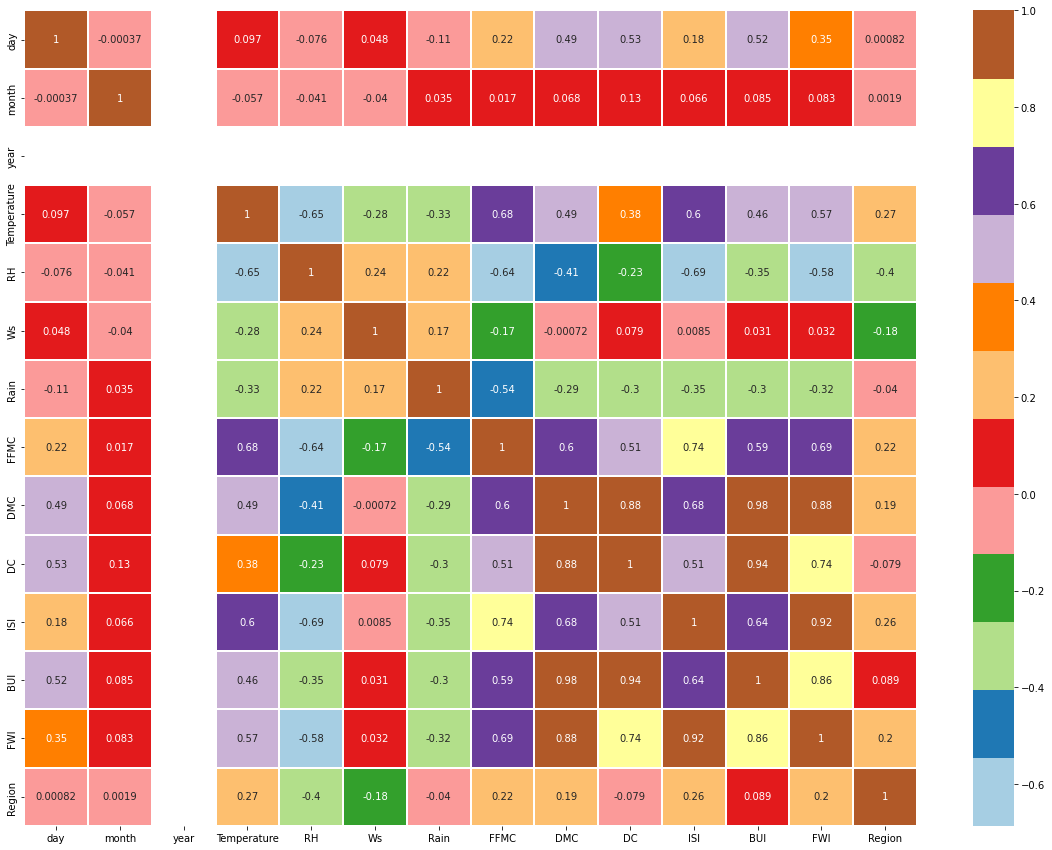

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, 
            cmap = "Paired",xticklabels="auto", yticklabels="auto")

In [36]:
df1.shape

(243, 15)

In [37]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)
df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [38]:
# Check counts
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

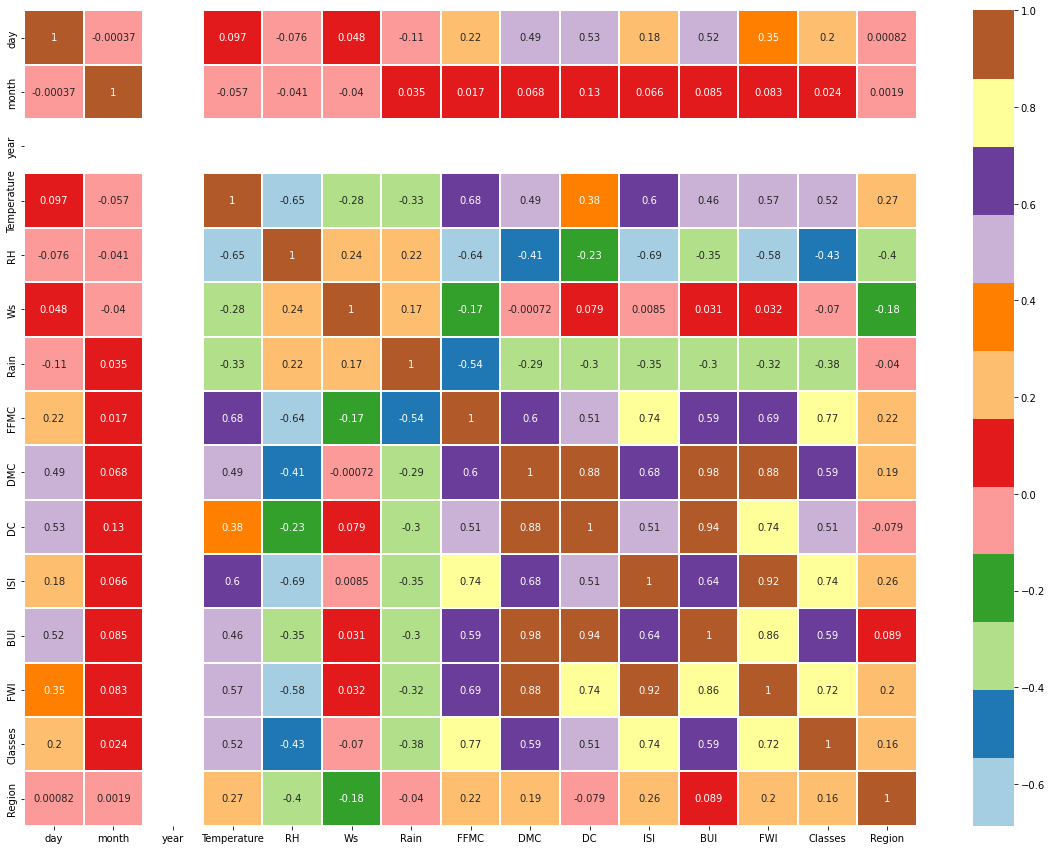

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, cmap = "Paired",xticklabels="auto", yticklabels="auto")

In [40]:
df1.to_csv('/content/drive/MyDrive/Projects/Algerian Forest Fire Prediction/Algerian_forest_fire_cleaned-data.csv', index=False)

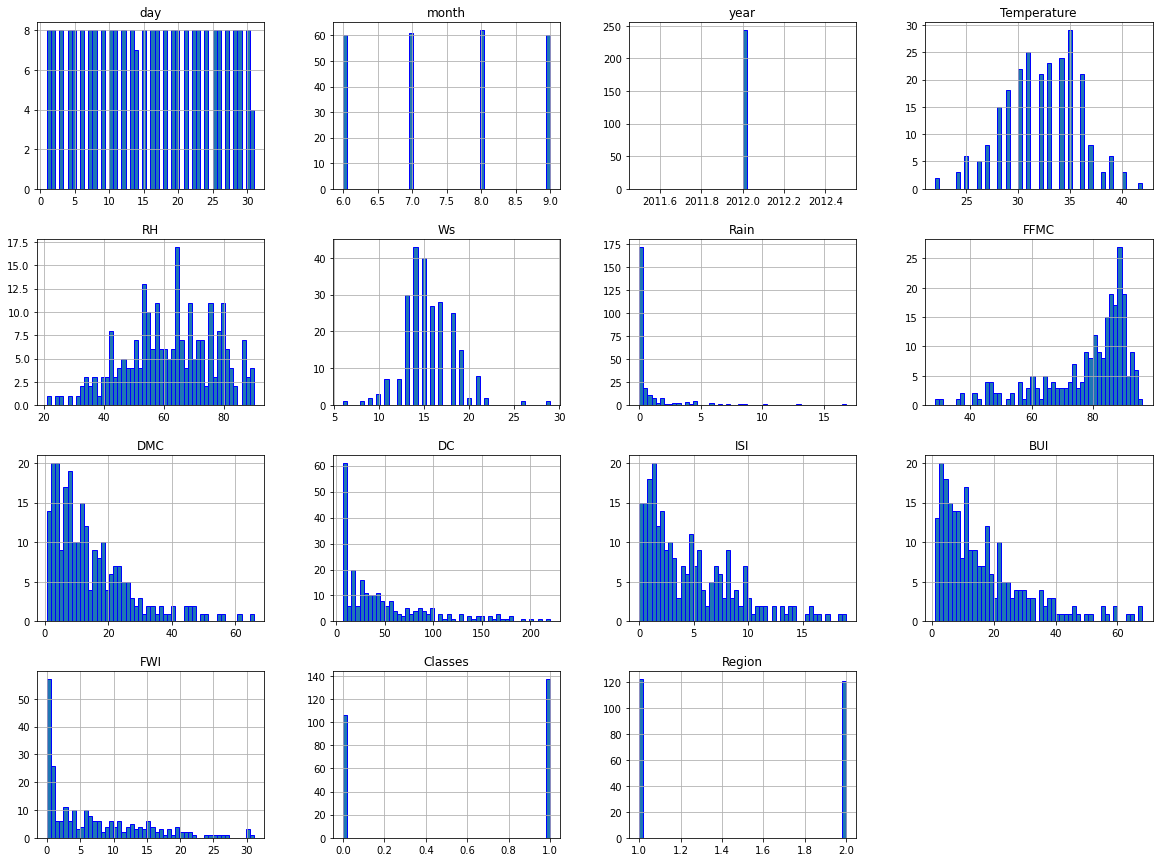

In [41]:
# PLot density plot for all features
#plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [42]:
# Percentage for PieChart
percentage = df1.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

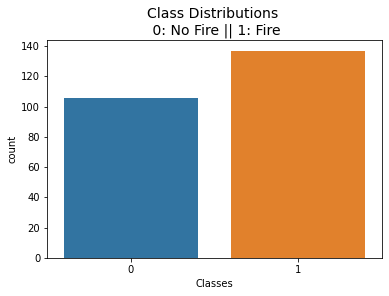

In [43]:
sns.countplot('Classes', data=df1, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=14)

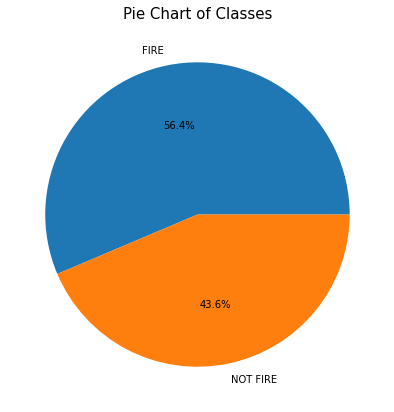

In [44]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

**Monthwise Fire Analysis**

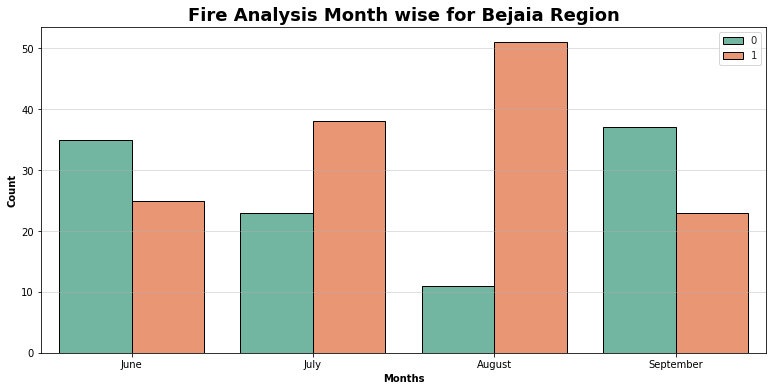

In [45]:
dftemp= df1.loc[df1['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

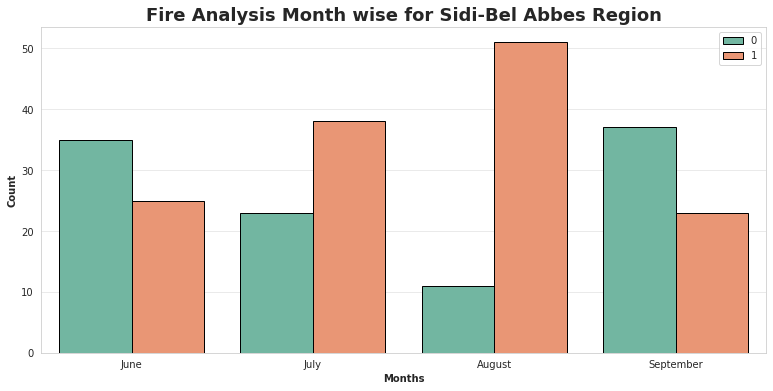

In [46]:
dftemp= df1.loc[df1['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

**Checking Multicollinearity**

- Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. 

- When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. 

- Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

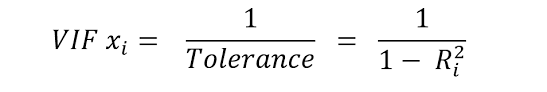

- There are few features which indicate the presence of multicollinearity because it has VIF value greater than 10.

- Need to deal with multicollinearity because regression analysis has the assumption that independent features should not have multicollinearity or they should not much correlated with each other

- Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

- As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. 

- This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 10 indicates a high multicollinearity.

In [47]:
x = df1.iloc[:, 0:13]
y = df1['Classes']

In [48]:
x.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [49]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)                        

        feature         VIF
0           day    1.487120
1         month    1.088510
2          year  514.359602
3   Temperature    2.415204
4            RH    2.764923
5            Ws    1.312931
6          Rain    1.551373
7          FFMC    4.120286
8           DMC   76.480443
9            DC   25.363045
10          ISI   23.122783
11          BUI  171.616713
12          FWI   40.471391


**Regression Anslysis**

In [51]:
#Droping features ['day','month','year'] beacuse it is not important for analysis 
df2 = df1.drop(['day','month','year'], axis=1)
df2.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


**Spliting the dataset into input and output feature for the regression analysis**

In [52]:
X = df2.iloc[:,0:10]
y= df2['FWI']

In [53]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [54]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

**Spliting the dataset into train and test**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [56]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [57]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.918573
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.855633
FWI,0.575406,-0.594299,0.013239,-0.326426,0.704563,0.882314,0.746551,0.918573,0.855633,1.000000


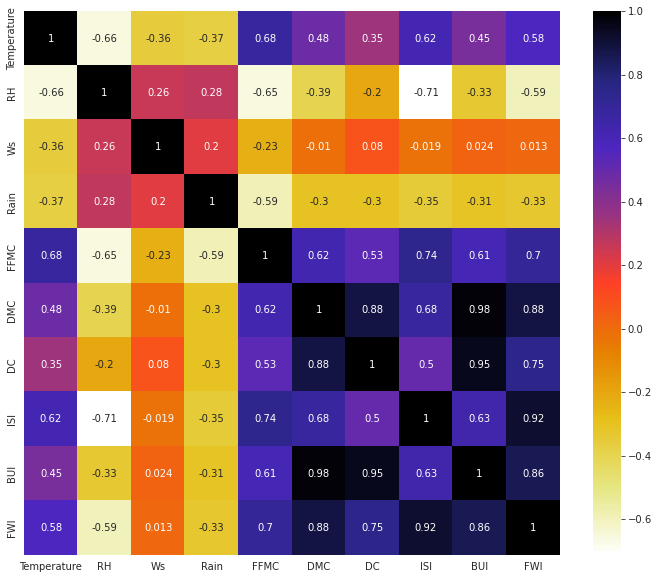

In [58]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Considering Correlation thresold value as 0.8.

# Check the correlation for independent features and the features having correlation more than 0.8 will remove from the analysis.

In [59]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [60]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

These three features are there which has correlation more than 0.8 so we will remove it

In [61]:
# drop features which has correlation more than 0.8
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 7), (61, 7))

**Scalling**

In [62]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [63]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Text(0.5, 1.0, 'X_train After Scaling')

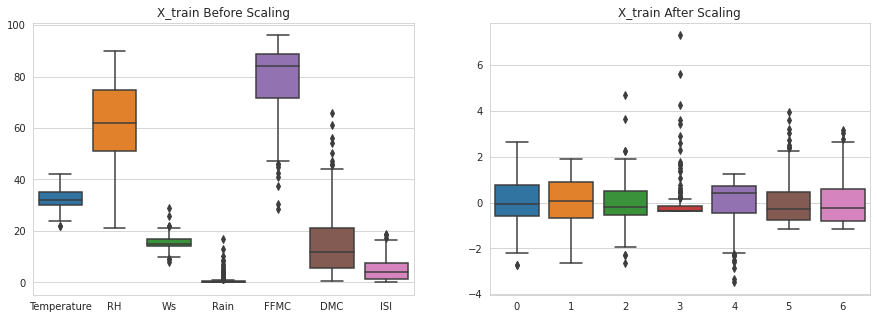

In [64]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## **Model Building For Regression Analysis**

**Linear Regression**

In [65]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train_scaled, y_train)

LinearRegression()

In [66]:
print('Intercept is :',Linear_Regression.intercept_)
print('Coefficient is :',Linear_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [-0.0283721   0.04109337  0.09627506 -0.01655616 -0.54243749  3.84845037
  4.99255741]


In [67]:
print("Training Score:",Linear_Regression.score(X_train_scaled, y_train))
print("Test Score:",Linear_Regression.score(X_test_scaled,y_test))

Training Score: 0.9695395305921733
Test Score: 0.9649932926605853


In [68]:
Linear_Regression_predict = Linear_Regression.predict(X_test_scaled)
Linear_Regression_predict

array([ 9.41506683,  7.60634268,  7.68400501,  5.87306673,  7.3204071 ,
       11.34540494, -0.58473564,  9.31241843,  5.2947767 , 12.68860125,
        1.57139689, 13.2981353 ,  6.47490843, 15.26509949,  1.01152587,
        0.81120535,  2.27728471,  2.67422231,  3.83854169,  1.11119187,
       10.66495822,  5.58060473,  7.0466882 , -0.44199717,  2.3401461 ,
        3.44770367, 10.05834609,  0.34170617,  1.2083714 ,  1.86224714,
       13.40002748,  0.93449111, -0.67888196, 19.91564396,  3.89121169,
        0.90915613,  1.28882678, 18.86588672, 25.91576425,  2.47906687,
        6.97663212,  0.64561693, -0.86232546,  1.40590421,  0.37128199,
       -0.60182731,  3.94663026,  6.97440062, -0.70005406, 10.67146818,
        3.94007684, 10.12127919, -0.53012129,  1.44974711,  6.40213474,
        1.73573959, 11.15055467,  3.46597162,  3.61834924, 17.39712585,
        3.48274909])

In [69]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Linear_Regression_predict})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.415067
150,7.2,7.606343
37,8.0,7.684005
75,6.3,5.873067
109,7.7,7.320407
71,12.1,11.345405
122,0.2,-0.584736
73,10.2,9.312418
154,5.2,5.294777
234,13.7,12.688601


In [70]:
meanAbErr = metrics.mean_absolute_error(y_test, Linear_Regression_predict)
meanSqErr = metrics.mean_squared_error(y_test, Linear_Regression_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Linear_Regression_predict))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.7123674928595758
Mean Square Error: 1.2152366305269509
Root Mean Square Error: 1.1023777168135025


In [71]:
# To find coefficient of determination
r2 =  r2_score(y_test, Linear_Regression_predict)
print("R-Square:",r2)

R-Square: 0.9649932926605853


**Lasso Regression**

In [72]:
from sklearn.linear_model import Lasso

Lasso_Regression = Lasso()
Lasso_Regression.fit(X_train_scaled, y_train)

Lasso()

In [73]:
print('Intercept is :',Lasso_Regression.intercept_)
print('Coefficient is :',Lasso_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [ 0.         -0.          0.         -0.          0.          3.14197888
  4.02820515]


In [74]:
print("Training Score:",Lasso_Regression.score(X_train_scaled, y_train))
print("Test Score:",Lasso_Regression.score(X_test_scaled,y_test))

Training Score: 0.9472315585164249
Test Score: 0.9376608745831527


In [75]:
Lasso_Regression_prediction = Lasso_Regression.predict(X_test_scaled)
Lasso_Regression_prediction

array([ 9.41205365,  7.99844254,  7.76713463,  6.42761844,  7.83424945,
       11.03474616,  0.37326534,  9.27417318,  5.89058614, 12.11675554,
        2.72767608, 12.55638802,  6.95133366, 14.13515689,  2.07735442,
        1.24093471,  3.10320145,  3.49365169,  4.72385091,  1.51841715,
       10.26716277,  6.14712828,  6.96067837,  0.42244758,  3.46938213,
        4.24233784,  9.83944744,  1.09703881,  1.31470808,  2.68483082,
       12.55370186,  1.49414759,  0.39087636, 17.96041947,  4.90661969,
        2.16540954,  2.41830086, 16.97516681, 22.97432223,  3.29295033,
        7.29260165,  1.57125023, -0.38573018,  2.6013912 ,  1.73340027,
       -0.37176998,  4.64610516,  7.30323258, -0.47711457, 10.22796835,
        4.88202857,  9.86532478, -0.37875008,  2.60504202,  6.64228   ,
        2.8087511 , 10.76789465,  4.44604691,  4.45302701, 15.93299497,
        4.35133325])

In [76]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Lasso_Regression_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.412054
150,7.2,7.998443
37,8.0,7.767135
75,6.3,6.427618
109,7.7,7.834249
71,12.1,11.034746
122,0.2,0.373265
73,10.2,9.274173
154,5.2,5.890586
234,13.7,12.116756


In [77]:
meanAbErr = metrics.mean_absolute_error(y_test, Lasso_Regression_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Lasso_Regression_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Lasso_Regression_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.1209175798372668
Mean Square Error: 2.164064960096106
Root Mean Square Error: 1.4710761231479852


In [78]:
# To find coefficient of determination
r2 =  r2_score(y_test, Lasso_Regression_prediction)
print("R-Square:",r2)

R-Square: 0.9376608745831527


**Ridge Regression**

In [79]:
from sklearn.linear_model import Ridge

Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train_scaled, y_train)

Ridge()

In [80]:
print('Intercept is :',Ridge_Regression.intercept_)
print('Coefficient is :',Ridge_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [-0.01703224  0.01276004  0.11637989 -0.00887201 -0.48703702  3.835665
  4.90903599]


In [81]:
print("Training Score:",Ridge_Regression.score(X_train_scaled, y_train))
print("Test Score:",Ridge_Regression.score(X_test_scaled,y_test))

Training Score: 0.9694958254406192
Test Score: 0.9639742744830118


In [82]:
Ridge_Regression_Prediction = Ridge_Regression.predict(X_test_scaled)
Ridge_Regression_Prediction

array([ 9.39251437,  7.68144118,  7.70805477,  5.91731777,  7.32277987,
       11.32549417, -0.61428455,  9.32458568,  5.3543275 , 12.65635671,
        1.59706538, 13.29229684,  6.55184685, 15.24012346,  1.05044499,
        0.76331626,  2.32580614,  2.73309097,  3.85451177,  1.01624726,
       10.69077819,  5.61188478,  7.08055598, -0.46839731,  2.37491246,
        3.51229491, 10.06004893,  0.3232503 ,  1.17452817,  1.82454279,
       13.39453097,  0.93204516, -0.69595345, 19.86219019,  3.89928561,
        0.9678519 ,  1.36704477, 18.81971539, 25.84228555,  2.53914197,
        6.9916163 ,  0.70911278, -0.9547782 ,  1.47941379,  0.41456389,
       -0.73618821,  4.02724413,  6.96390552, -0.80439019, 10.71466028,
        3.96312558, 10.13018053, -0.58420548,  1.47875037,  6.39480936,
        1.77634234, 11.1494399 ,  3.56732834,  3.74032479, 17.37273034,
        3.48970483])

In [83]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Ridge_Regression_Prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.392514
150,7.2,7.681441
37,8.0,7.708055
75,6.3,5.917318
109,7.7,7.322780
71,12.1,11.325494
122,0.2,-0.614285
73,10.2,9.324586
154,5.2,5.354328
234,13.7,12.656357


In [84]:
meanAbErr = metrics.mean_absolute_error(y_test, Ridge_Regression_Prediction)
meanSqErr = metrics.mean_squared_error(y_test, Ridge_Regression_Prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Ridge_Regression_Prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.7308753011423624
Mean Square Error: 1.2506112290161342
Root Mean Square Error: 1.1183073052681602


In [85]:
# To find coefficient of determination
r2 =  r2_score(y_test, Ridge_Regression_Prediction)
print("R-Square:",r2)

R-Square: 0.9639742744830118


**Support Vector Regressor**

In [86]:
from sklearn.svm import SVR

Support_Vector_Regressor = SVR()
Support_Vector_Regressor.fit(X_train_scaled, y_train)

SVR()

In [87]:
print("Training Score:",Support_Vector_Regressor.score(X_train_scaled, y_train))
print("Test Score:",Support_Vector_Regressor.score(X_test_scaled,y_test))

Training Score: 0.8654280469866374
Test Score: 0.9346390408170823


In [88]:
Support_Vector_Regressor_prediction = Support_Vector_Regressor.predict(X_test_scaled)
Support_Vector_Regressor_prediction

array([ 9.04919795,  7.44998853,  7.86829281,  5.03177169,  7.07139761,
       11.48142099,  0.58197051,  9.8666704 ,  5.49748124, 12.77500309,
        1.80584425, 14.76040113,  6.26403927, 15.57852231,  0.30458029,
        0.0824374 ,  0.82294384,  2.54326347,  3.88870461,  1.07080613,
       10.41113927,  5.76422659,  5.41477393,  0.18058585,  2.63252129,
        3.54677155, 10.49808871, -0.19078061,  1.07923562,  4.11667669,
       13.56551436,  0.57275891,  0.45918287, 19.90339663,  3.99008023,
        0.95408843,  0.5626649 , 15.40358812, 18.75260209,  1.02819697,
        7.1660957 ,  1.62005104,  1.02137712,  1.66452929,  1.09087136,
        1.44307485,  3.9596869 ,  6.74097936,  1.31953891,  9.44317725,
        3.99491186, 10.85847028,  1.51584043,  2.17492734,  5.30440043,
        2.5080567 , 12.40467876,  2.8645062 ,  3.60909744, 18.76092814,
        3.4910059 ])

In [89]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Support_Vector_Regressor_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.049198
150,7.2,7.449989
37,8.0,7.868293
75,6.3,5.031772
109,7.7,7.071398
71,12.1,11.481421
122,0.2,0.581971
73,10.2,9.866670
154,5.2,5.497481
234,13.7,12.775003


In [90]:
meanAbErr = metrics.mean_absolute_error(y_test, Support_Vector_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Support_Vector_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Support_Vector_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.8914626084250336
Mean Square Error: 2.268966087993883
Root Mean Square Error: 1.5063087625031872


In [91]:
# To find coefficient of determination
r2 =  r2_score(y_test, Support_Vector_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9346390408170823


**Random Forest Regressor**

In [92]:
from sklearn.ensemble import RandomForestRegressor

Random_Forest_Regressor = RandomForestRegressor()
Random_Forest_Regressor.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [93]:
Random_Forest_Regressor_prediction = Random_Forest_Regressor.predict(X_test_scaled)
Random_Forest_Regressor_prediction

array([1.0680e+01, 7.4080e+00, 7.3600e+00, 4.8300e+00, 8.2290e+00,
       1.2384e+01, 2.2400e-01, 9.1040e+00, 6.1040e+00, 1.2934e+01,
       1.4870e+00, 1.3993e+01, 6.1950e+00, 1.5791e+01, 6.8400e-01,
       1.7700e-01, 1.2180e+00, 2.3380e+00, 5.3380e+00, 1.9100e-01,
       5.3640e+00, 6.2310e+00, 2.6220e+00, 2.1100e-01, 2.7730e+00,
       2.9210e+00, 9.9470e+00, 3.3000e-01, 1.6000e-01, 8.0100e-01,
       1.5410e+01, 4.0500e-01, 2.4200e-01, 2.1717e+01, 5.1880e+00,
       8.3700e-01, 9.4400e-01, 1.5368e+01, 2.7671e+01, 1.2680e+00,
       7.0300e+00, 9.1500e-01, 1.1700e-01, 1.9940e+00, 8.5400e-01,
       4.0000e-03, 3.3910e+00, 7.0930e+00, 1.1000e-02, 3.8590e+00,
       5.0370e+00, 1.0788e+01, 7.0000e-03, 2.4590e+00, 6.8170e+00,
       2.1490e+00, 1.2092e+01, 3.4010e+00, 3.4190e+00, 1.8791e+01,
       3.1380e+00])

In [94]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Random_Forest_Regressor_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,10.680
150,7.2,7.408
37,8.0,7.360
75,6.3,4.830
109,7.7,8.229
71,12.1,12.384
122,0.2,0.224
73,10.2,9.104
154,5.2,6.104
234,13.7,12.934


In [95]:
meanAbErr = metrics.mean_absolute_error(y_test, Random_Forest_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Random_Forest_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Random_Forest_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.5803770491803277
Mean Square Error: 0.6203259508196727
Root Mean Square Error: 0.787607739182185


In [96]:
# To find coefficient of determination
r2 =  r2_score(y_test, Random_Forest_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9821305838962637


**K-Neighbors Regressor**

In [97]:
from sklearn.neighbors import KNeighborsRegressor

K_Neighbors_Regressor = KNeighborsRegressor()
K_Neighbors_Regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [98]:
K_Neighbors_Regressor_prediction = K_Neighbors_Regressor.predict(X_test_scaled)
K_Neighbors_Regressor_prediction

array([ 7.48,  7.14,  8.82,  4.5 ,  7.22, 11.1 ,  0.4 , 10.54,  8.44,
       12.9 ,  1.68, 13.  ,  5.68, 16.28,  0.54,  0.26,  0.54,  0.7 ,
        4.84,  0.2 , 12.02,  7.16,  4.88,  0.3 ,  3.88,  4.58, 10.12,
        0.3 ,  0.3 ,  1.76, 16.26,  0.4 ,  0.36, 19.56,  5.54,  1.46,
        1.26, 18.1 , 28.3 ,  0.82,  7.56,  0.98,  0.08,  1.64,  1.88,
        0.06,  4.48,  7.14,  0.1 , 11.04,  5.36, 12.18,  0.12,  2.26,
        5.22,  2.34, 10.68,  3.1 ,  0.94, 15.82,  3.34])

In [99]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': K_Neighbors_Regressor_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,7.48
150,7.2,7.14
37,8.0,8.82
75,6.3,4.50
109,7.7,7.22
71,12.1,11.10
122,0.2,0.40
73,10.2,10.54
154,5.2,8.44
234,13.7,12.90


In [100]:
meanAbErr = metrics.mean_absolute_error(y_test, K_Neighbors_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, K_Neighbors_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, K_Neighbors_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.917377049180328
Mean Square Error: 1.8540065573770488
Root Mean Square Error: 1.3616190940850708


In [101]:
# To find coefficient of determination
r2 =  r2_score(y_test, K_Neighbors_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9465925702623768


### **Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| Random Forest Regressor     | 97.98 % |
| Linear Regression  | 96.50 % |
| Ridge Regression  | 96.40 % |
| K Neighbors Regressor  | 94.65 %|
| Lasso Regression  | 93.77 % |
| Support Vector Regressor     | 93.47 % |

# **Hyperparameter Tuning**

**Tuning Random Forest Regressor**

In [102]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

Random_Forest_Regressor = RandomForestRegressor()
Random_rf = RandomizedSearchCV(Random_Forest_Regressor,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [103]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
bestrf_pred

array([1.06469378e+01, 7.33091880e+00, 7.37215040e+00, 4.57976580e+00,
       8.58709664e+00, 1.22946107e+01, 2.30863059e-01, 9.23871598e+00,
       6.25541139e+00, 1.28270845e+01, 1.44861389e+00, 1.40487478e+01,
       6.44549526e+00, 1.54660389e+01, 6.23307745e-01, 1.81750794e-01,
       1.35008849e+00, 2.27975873e+00, 5.34230841e+00, 1.76167460e-01,
       4.58353813e+00, 6.33561497e+00, 2.18176851e+00, 2.19122583e-01,
       2.72766071e+00, 2.89533456e+00, 9.81989766e+00, 3.40756252e-01,
       1.45053175e-01, 1.15660851e+00, 1.51346909e+01, 3.93909488e-01,
       2.58858297e-01, 2.21086718e+01, 5.37285404e+00, 8.64028669e-01,
       8.41593290e-01, 1.56985895e+01, 2.74520945e+01, 1.52769722e+00,
       7.24157886e+00, 6.84554448e-01, 1.04255556e-01, 2.16447825e+00,
       8.95579895e-01, 2.18761905e-02, 3.41582330e+00, 7.25096886e+00,
       2.00928571e-02, 3.11923748e+00, 5.27893063e+00, 1.05124664e+01,
       1.52261905e-02, 2.51916317e+00, 6.94261496e+00, 2.34525126e+00,
      

In [104]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': bestrf_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,10.646938
150,7.2,7.330919
37,8.0,7.372150
75,6.3,4.579766
109,7.7,8.587097
71,12.1,12.294611
122,0.2,0.230863
73,10.2,9.238716
154,5.2,6.255411
234,13.7,12.827085


In [105]:
meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, K_Neighbors_Regressor_prediction)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.6335361656103461
Mean Square Error: 0.8530773443892619
Root Mean Square Error: 0.9236218622300264
R-Square: 0.9465925702623768


# **Feature Selection**

- In feature selection will select only 5 important feature that will be important in order to make the prediction.

- I will drop the rest of features so we can build an interactive and user friendly web app.

In [106]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
6,ISI,0.703398
4,FFMC,0.167211
5,DMC,0.120892
2,Ws,0.003940
1,RH,0.003741
0,Temperature,0.000690
3,Rain,0.000128


- Here the 5 important feature are **ISI**, **FFMC**, **DMC**, **RH** and **Ws** that will used to make the prediction and will use for making front end application.

Text(0, 0.5, 'Features')

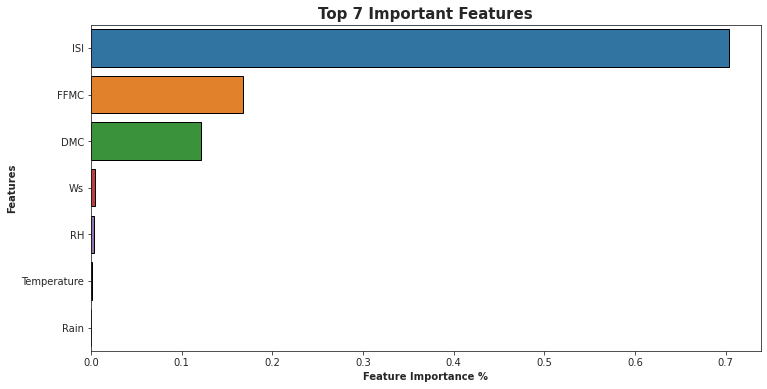

In [107]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

# **Model for deployment**

In [108]:
X_train_new = X_train.drop(['Rain', 'RH'], axis=1)
X_test_new = X_test.drop(['Rain', 'RH'], axis=1)

In [109]:
X_train_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [110]:
X_test_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [111]:
X_train_new_scaled, X_test_new_scaled = scaler_standard(X_train_new, X_test_new)

In [112]:
best_random_grid.fit(X_train_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(X_test_new_scaled)
bestrf_pred

array([1.04267679e+01, 7.41741190e+00, 7.13935754e+00, 4.54070364e+00,
       8.45902738e+00, 1.26504698e+01, 2.28194408e-01, 9.24541905e+00,
       6.13588639e+00, 1.31477392e+01, 1.61878929e+00, 1.41847538e+01,
       6.46657781e+00, 1.58204881e+01, 6.29536291e-01, 1.77128175e-01,
       1.37182947e+00, 2.19807464e+00, 5.10135469e+00, 1.77642460e-01,
       4.93772587e+00, 6.16346554e+00, 2.34285884e+00, 2.27927742e-01,
       2.75566181e+00, 2.95337769e+00, 1.00682854e+01, 3.46440440e-01,
       1.38948413e-01, 9.42878283e-01, 1.53115365e+01, 4.11565873e-01,
       2.75643615e-01, 2.29564464e+01, 5.19592691e+00, 8.35284898e-01,
       8.52343953e-01, 1.62860438e+01, 2.76801414e+01, 1.51460884e+00,
       6.90136713e+00, 6.86980209e-01, 9.01884921e-02, 2.13486317e+00,
       8.69118723e-01, 1.62357143e-02, 3.32132971e+00, 7.08678770e+00,
       1.17440476e-02, 3.67975325e+00, 4.92929083e+00, 1.03346115e+01,
       1.09821429e-02, 2.56531466e+00, 6.68065418e+00, 2.32936714e+00,
      

In [113]:
meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, K_Neighbors_Regressor_prediction)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.5870466227078932
Mean Square Error: 0.7023899624650307
Root Mean Square Error: 0.8380870852513065
R-Square: 0.9465925702623768


In [114]:
import bz2,pickle
file = bz2.BZ2File('/content/drive/MyDrive/Projects/Algerian Forest Fire Prediction/Regression.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()

# **Classification**

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [116]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [117]:
X = df2.iloc[:, 0:10]
y = df2['Classes']

In [118]:
X.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [119]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int64

In [120]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((170, 10), (73, 10))

In [121]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [122]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

In [123]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 7), (73, 7))

In [124]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

**Logistic Regression**

In [125]:
# Import Logistic Regression to Train from SKlearn
Logistic_Regression  = LogisticRegression()
Logistic_Regression.fit(X_train_scaled,y_train)

LogisticRegression()

In [126]:
print('Intercept is :',Logistic_Regression.intercept_)
print('Coefficient is :',Logistic_Regression.coef_)

Intercept is : [0.64908314]
Coefficient is : [[-0.00930744  0.24687675 -0.22764197 -0.53826457  2.53955465  0.9313307
   2.75456708]]


In [127]:
print("Training Score:",Logistic_Regression.score(X_train_scaled, y_train))
print("Test Score:",Logistic_Regression.score(X_test_scaled,y_test))

Training Score: 0.9705882352941176
Test Score: 0.9178082191780822


In [128]:
Logistic_Regression_Prediction = Logistic_Regression.predict(X_test_scaled)
Logistic_Regression_Prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [129]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Logistic_Regression_Prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [130]:
Score = accuracy_score(y_test,Logistic_Regression_Prediction)
Classification_Report = classification_report(y_test,Logistic_Regression_Prediction)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic Regression
Accuracy Score value: 0.9178
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.97      0.88      0.93        43

    accuracy                           0.92        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.92      0.92      0.92        73



| Metrics     | Definition  |
| ----------- | ----------- |
| Precision      | Precision is defined as the ratio of true positives to the sum of true and false positives.       |
| Recall   | Recall is defined as the ratio of true positives to the sum of true positives and false negatives.        |
| F1 Score  | The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.   |

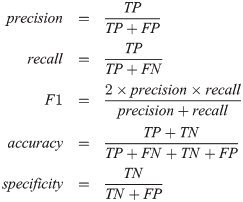

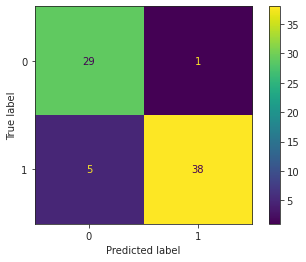

In [131]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Logistic_Regression, X_test_scaled, y_test)
Logistic_Regression_Confusion_Matrix

**Decision Tree**

In [132]:
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [133]:
Decision_Tree_Classifier_prediction = Decision_Tree_Classifier.predict(X_test_scaled)
Decision_Tree_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [134]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Decision_Tree_Classifier_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [135]:
Score = accuracy_score(y_test,Decision_Tree_Classifier_prediction)
Classification_Report = classification_report(y_test,Decision_Tree_Classifier_prediction)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Decision Tree
Accuracy Score value: 0.9452
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.98      0.93      0.95        43

    accuracy                           0.95        73
   macro avg       0.94      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



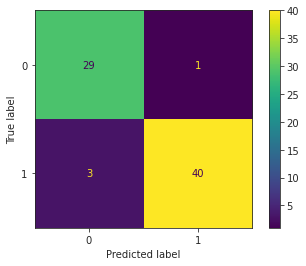

In [136]:
Decision_Tree_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Decision_Tree_Classifier, X_test_scaled, y_test)
Decision_Tree_Classifier_Confusion_Matrix

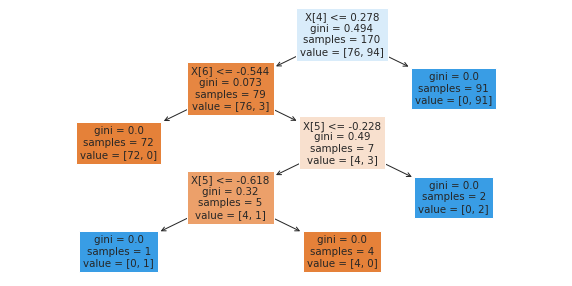

In [137]:
plt.figure(figsize = (10,5))
tree.plot_tree(Decision_Tree_Classifier,filled = True)
plt.show()

**Random Forest**

In [138]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_Classifier = RandomForestClassifier()
Random_Forest_Classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [139]:
print("Training Score:",Random_Forest_Classifier.score(X_train_scaled, y_train))
print("Test Score:",Random_Forest_Classifier.score(X_test_scaled,y_test))

Training Score: 1.0
Test Score: 0.9726027397260274


In [140]:
Random_Forest_Classifier_prediction = Random_Forest_Classifier.predict(X_test_scaled)
Random_Forest_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [141]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Random_Forest_Classifier_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [142]:
Score = accuracy_score(y_test,Random_Forest_Classifier_prediction)
Classification_Report = classification_report(y_test,Random_Forest_Classifier_prediction)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Random Forest
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



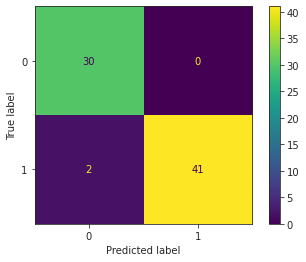

In [143]:
Random_Forest_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Random_Forest_Classifier, X_test_scaled, y_test)
Random_Forest_Classifier_Confusion_Matrix

**K_Neighbors Classifier**

In [144]:
# KNeighborsClassifier to Train from SKlearn
K_Neighbors_Classifier = KNeighborsClassifier()
K_Neighbors_Classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [145]:
print("Training Score:",K_Neighbors_Classifier.score(X_train_scaled, y_train))
print("Test Score:",K_Neighbors_Classifier.score(X_test_scaled,y_test))

Training Score: 0.9647058823529412
Test Score: 0.9315068493150684


In [146]:
K_Neighbors_Classifier_prediction = K_Neighbors_Classifier.predict(X_test_scaled)
K_Neighbors_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [147]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': K_Neighbors_Classifier_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [148]:
Score = accuracy_score(y_test,K_Neighbors_Classifier_prediction)
Classification_Report = classification_report(y_test,K_Neighbors_Classifier_prediction)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

KNeighbors Classifier
Accuracy Score value: 0.9315
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.95      0.93      0.94        43

    accuracy                           0.93        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.93      0.93      0.93        73



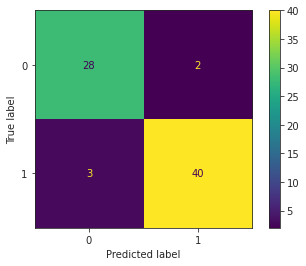

In [149]:
K_Neighbors_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(K_Neighbors_Classifier, X_test_scaled, y_test)
K_Neighbors_Classifier_Confusion_Matrix

**XGboost Model**

In [150]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)

XGBClassifier()

In [151]:
print("Training Score:",xgb.score(X_train_scaled, y_train))
print("Test Score:",xgb.score(X_test_scaled,y_test))

Training Score: 0.9941176470588236
Test Score: 0.9726027397260274


In [152]:
xgb_predic = xgb.predict(X_test_scaled)
xgb_predic

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [153]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': xgb_predic})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [154]:
Score = accuracy_score(y_test, xgb_predic)
Classification_Report = classification_report(y_test, xgb_predic)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

XGboost Classifier
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



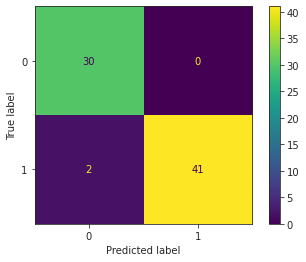

In [155]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test)

**Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGboost classifier     | 97.26 % |
| Random Forest Classifier  | 97.26 % |
| Decision Tree Classifier  | 94.52 % |
| KNeighbors Classifier  | 93.15 %|
| Logistic Regression Accurracy  | 91.78 % |



# **HyperParameter Tuning**

**XGboost classifier Tuning**

In [156]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train_scaled, y_train).best_estimator_

XGBClassifier(colsample_bytree=0.3, gamma=0.4, learning_rate=1.1111111111111112,
              max_depth=21, min_child_weight=7)

In [157]:
Best_xgb = Random_xgb.best_estimator_
Best_xgb.score(X_test_scaled,y_test)

0.9452054794520548

In [158]:
Bestxgb_prediction = Best_xgb.predict(X_test_scaled)
Bestxgb_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [159]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Bestxgb_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [160]:
Score = accuracy_score(y_test, Bestxgb_prediction)
Classification_Report = classification_report(y_test,Bestxgb_prediction)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL XGB
Accuracy Score value: 0.9452
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.98      0.93      0.95        43

    accuracy                           0.95        73
   macro avg       0.94      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



**Random Forest classifier Tuning**

In [161]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
Random_rf = RandomizedSearchCV(Random_Forest_Classifier, params, cv = 10,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train).best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=13, max_features='log2',
                       min_samples_leaf=4, min_samples_split=7,
                       n_estimators=130)

In [162]:
Best_rf = Random_rf.best_estimator_
Best_rf.score(X_test_scaled,y_test)

0.9726027397260274

In [163]:
Bestrf_pred = Best_rf.predict(X_test_scaled)
Bestrf_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [164]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Bestrf_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [165]:
Score = accuracy_score(y_test, Bestrf_pred)
Classification_Report = classification_report(y_test,Bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL Random Forest
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



# **Model Selection**

**Applying Stratified Kfold Cross-Validation to know the exact Mean CV Accuracy Score for all models**

- Implementing the concept of StratifiedK fold sampling in cross-validation ensures the training and test sets have the same proportion of the feature of interest as in the original dataset. 

- Doing this with the target variable ensures good accuracy without error.

In [166]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 0)

In [167]:
cv_xgb= cross_val_score(Best_xgb,X,y,cv=skfold,scoring='accuracy').mean()
print('CV Score XGB Tuned {:.4f}'.format(cv_xgb))

CV Score XGB Tuned 0.9668


In [168]:
cv_rf=cross_val_score(Random_Forest_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))

CV Score Random Forest 0.9793


In [169]:
cv_dt =cross_val_score(Decision_Tree_Classifier,X,y,cv= skfold,scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.9752


In [170]:
cv_knn =cross_val_score(K_Neighbors_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score KNN Classifier {:.4f}'.format(cv_knn))

CV Score KNN Classifier 0.9052


In [171]:
cv_lg=cross_val_score(Logistic_Regression,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Logistic Regression {:.4f}'.format(cv_lg))

CV Score Logistic Regression 0.9630


### 7.2 **CV Score score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGBoost Classifier     | 97.52 % |
| Random Forest  | 97.52 % |
| K Neighbors Classifier  | 97.52 %|
| Decision Tree Classifier  | 97.52 % |
| Logistic Regression  | 96.32 % |

- From the above result XGBoost Classifier has given better Result so will proceed with that model for model Deployment.

- For the web app, I will use the 5 most important features that are helpful in predicting the fire since we it would be pain to front end user to fill all 8 features on the web app. 

- I will drop the rest of features so we can build an interactive and user friendly web app.

**Fetaure Selection for Model Deployment**

In [172]:
feature_importances = Random_xgb.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
3,Rain,0.527440
6,ISI,0.433540
1,RH,0.039021
0,Temperature,0.000000
2,Ws,0.000000
4,FFMC,0.000000
5,DMC,0.000000


Text(0, 0.5, 'Features')

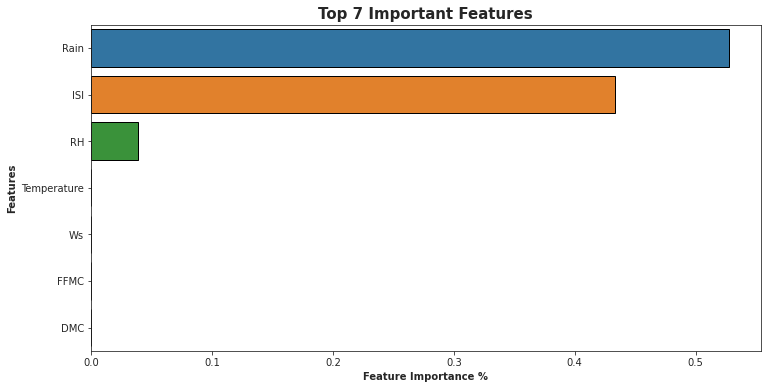

In [173]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

# **Model Deployment**

In [174]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [175]:
X_train_new = X_train.drop(['Rain', 'RH'], axis=1)
X_test_new = X_test.drop(['Rain', 'RH'], axis=1)

In [176]:
X_train_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [177]:
X_test_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [178]:
X_train_new_scaled, X_test_new_scaled = scaler_standard(X_train_new, X_test_new)

In [179]:
xgb_model =Random_xgb.fit(X_train_new_scaled, y_train).best_estimator_
xgb_model.score(X_test_new_scaled, y_test)

0.9452054794520548

In [180]:
xgb_model_pred = xgb_model.predict(X_test_new_scaled)
xgb_model_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [181]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': xgb_model_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [182]:
Score = accuracy_score(y_test, xgb_model_pred)
Classification_Report = classification_report(y_test, xgb_model_pred)
print("Final Model XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Final Model XGB
Accuracy Score value: 0.9452
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       1.00      0.91      0.95        43

    accuracy                           0.95        73
   macro avg       0.94      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



In [183]:
import bz2,pickle
file = bz2.BZ2File('/content/drive/MyDrive/Projects/Algerian Forest Fire Prediction/Classification.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()